# 🌍 Searching for Earth-like Worlds

### Objective:
Explore the characteristics of confirmed exoplanets to identify those most similar to Earth in terms of size, temperature, and habitability potential. We'll use data visualization and clustering to uncover patterns.



## 📊 Dataset Description

We use the **NASA Exoplanet Archive** containing confirmed exoplanets. Key variables:

| Column       | Description                              |
|--------------|------------------------------------------|
| `pl_name`    | Planet name                              |
| `pl_rade`    | Radius (in Earth radii)                  |
| `pl_bmasse`  | Mass (in Earth masses)                   |
| `pl_eqt`     | Equilibrium temperature (K)              |
| `pl_orbper`  | Orbital period (days)                    |
| `st_teff`    | Star surface temperature (K)             |
| `st_rad`     | Star radius (in solar radii)             |
| `sy_dist`    | Distance to system (parsecs)             |
| `disc_year`  | Year discovered                          |



---
---

## 🔍 Relevance of the Dataset for the Project

---

### ✅ 1. **How the Dataset Supports This Goal**

| Dataset Feature         | Why It Matters to the Project                                       |
|-------------------------|---------------------------------------------------------------------|
| `pl_rade` _(Planet Radius)_     | Helps find planets with similar size to Earth (≈1 Earth radius)         |
| `pl_bmasse` _(Planet Mass)_     | Critical to assess density & surface gravity; Earth ≈ 1 Earth mass      |
| `pl_eqt` _(Equilibrium Temperature)_ | Indicates potential habitability; Earth-like planets ≈ 288 K        |
| `sy_dist` _(Distance from Earth)_   | Nearby planets are more accessible for future study or observation    |
| `disc_year`, `discoverymethod`     | Supports trend analysis: how and when Earth-like planets are found    |

These features enable us to:
- **Quantify Earth similarity**
- **Filter, cluster, and visualize** Earth analogs
- **Study discovery patterns** over time and by method

---

### ✅ 2. **Supports Effective Visualization**

- Many features are numeric and ideal for:
  - **Histograms** (e.g., mass, radius)
  - **Scatter plots** (e.g., radius vs. temperature)
  - **Heatmaps, KDE plots, and clustering** to reveal groupings and trends

This enhances both interpretation and visual storytelling.

---

### ✅ 3. **Scientific Relevance**

The search for Earth-like exoplanets is a **core frontier in astronomy**:
- It supports research in **astrobiology**, **habitability**, and **future interstellar missions**
- The dataset contains confirmed findings from missions like **Kepler**, **TESS**, and ground observatories

My project uses this cutting-edge dataset to address a **globally significant scientific question**, making it highly suitable as a capstone in the field of astronomy and data analytics.


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style='whitegrid')

# Load the dataset from NASA
url = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,disc_year,pl_orbper,pl_rade,pl_bmasse,pl_eqt,st_teff,st_rad,st_mass,sy_dist+from+pscomppars&format=csv'
df = pd.read_csv(url)

# Preview data
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5926 entries, 0 to 5925
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5926 non-null   object 
 1   hostname         5926 non-null   object 
 2   discoverymethod  5926 non-null   object 
 3   disc_year        5926 non-null   int64  
 4   pl_orbper        5629 non-null   float64
 5   pl_rade          5904 non-null   float64
 6   pl_bmasse        5895 non-null   float64
 7   pl_eqt           4408 non-null   float64
 8   st_teff          5665 non-null   float64
 9   st_rad           5643 non-null   float64
 10  st_mass          5919 non-null   float64
 11  sy_dist          5900 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 555.7+ KB
None


,pl_name,hostname,discoverymethod,disc_year,pl_orbper,pl_rade,pl_bmasse,pl_eqt,st_teff,st_rad,st_mass,sy_dist
0,Kepler-235 e,Kepler-235,Transit,2014,46.183669,2.22,5.56,306.0,4255.00,0.554,0.581,428.018
1,Kepler-334 d,Kepler-334,Transit,2014,25.098490,1.41,2.57,656.0,5828.00,1.068,1.022,426.590
2,Kepler-279 c,Kepler-279,Transit,2013,35.736000,4.30,49.40,774.0,6689.45,1.070,1.100,1037.400
3,Kepler-251 d,Kepler-251,Transit,2014,30.133001,2.77,8.10,536.0,5526.00,0.890,0.891,924.625
4,Kepler-729 b,Kepler-729,Transit,2016,3.166354,3.58,12.50,1273.0,5633.00,0.910,0.940,1921.150


##Data Cleaning

In [ ]:
# Keep relevant columns and drop rows with missing values
columns_to_keep = ['pl_name', 'pl_rade', 'pl_bmasse', 'pl_eqt', 'sy_dist', 'discoverymethod', 'disc_year']
df_clean = df[columns_to_keep].dropna()

#Preview
df.head()


,pl_name,hostname,discoverymethod,disc_year,pl_orbper,pl_rade,pl_bmasse,pl_eqt,st_teff,st_rad,st_mass,sy_dist
0,Kepler-235 e,Kepler-235,Transit,2014,46.183669,2.22,5.56,306.0,4255.00,0.554,0.581,428.018
1,Kepler-334 d,Kepler-334,Transit,2014,25.098490,1.41,2.57,656.0,5828.00,1.068,1.022,426.590
2,Kepler-279 c,Kepler-279,Transit,2013,35.736000,4.30,49.40,774.0,6689.45,1.070,1.100,1037.400
3,Kepler-251 d,Kepler-251,Transit,2014,30.133001,2.77,8.10,536.0,5526.00,0.890,0.891,924.625
4,Kepler-729 b,Kepler-729,Transit,2016,3.166354,3.58,12.50,1273.0,5633.00,0.910,0.940,1921.150


In [ ]:
 #Rename a few columns for readability
df_clean.rename(columns={
    'pl_rade': 'radius',               # Planet radius (in Earth radii)
    'pl_bmasse': 'mass',               # Planet mass (in Earth masses)
    'pl_eqt': 'temperature',           # Planet equilibrium temperature
    'sy_dist': 'distance',             # Distance from Earth (parsecs)
}, inplace=True)

# Preview cleaned data
df_clean.head()

,pl_name,radius,mass,temperature,distance,discoverymethod,disc_year
0,Kepler-235 e,2.22,5.56,306.0,428.018,Transit,2014
1,Kepler-334 d,1.41,2.57,656.0,426.590,Transit,2014
2,Kepler-279 c,4.30,49.40,774.0,1037.400,Transit,2013
3,Kepler-251 d,2.77,8.10,536.0,924.625,Transit,2014
4,Kepler-729 b,3.58,12.50,1273.0,1921.150,Transit,2016


In [ ]:
# Check for any null values in df_clean
null_summary = df_clean.isnull().sum()

# Display columns with null counts (if any)
print(" Null Value Summary:")
print(null_summary)

# Confirm if the dataset is completely clean
if null_summary.sum() == 0:
    print("\n No missing values found in df_clean. Data is clean and ready for analysis.")
else:
    print("\n Warning: Some columns still contain missing values.")


 Null Value Summary:
pl_name            0
radius             0
mass               0
temperature        0
distance           0
discoverymethod    0
disc_year          0
dtype: int64

 No missing values found in df_clean. Data is clean and ready for analysis.


## 📈 Exploratory Data Analysis (EDA)

We’ll visualize distributions and relationships to detect patterns, outliers, and potential Earth-like candidates.


###Planet Radius distribution

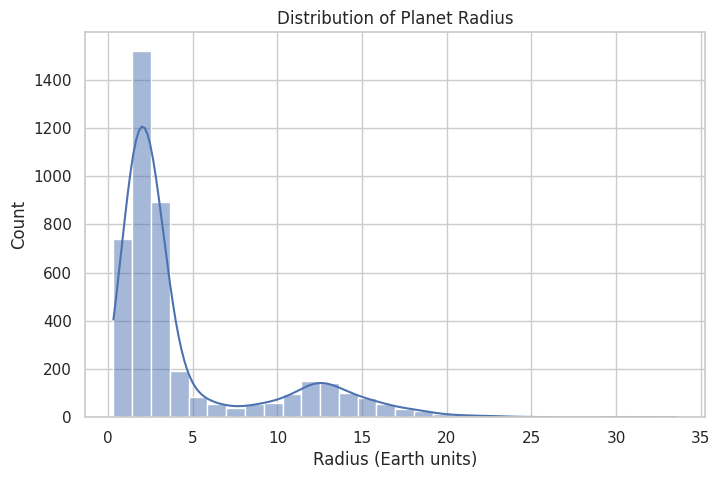

In [ ]:
# Plot the distribution of planet radii to understand the common sizes
plt.figure(figsize=(8,5))
sns.histplot(df_clean['radius'], bins=30, kde=True)
plt.title('Distribution of Planet Radius')
plt.xlabel('Radius (Earth units)')
plt.ylabel('Count')
plt.show()


###Radius vs Temperature plot

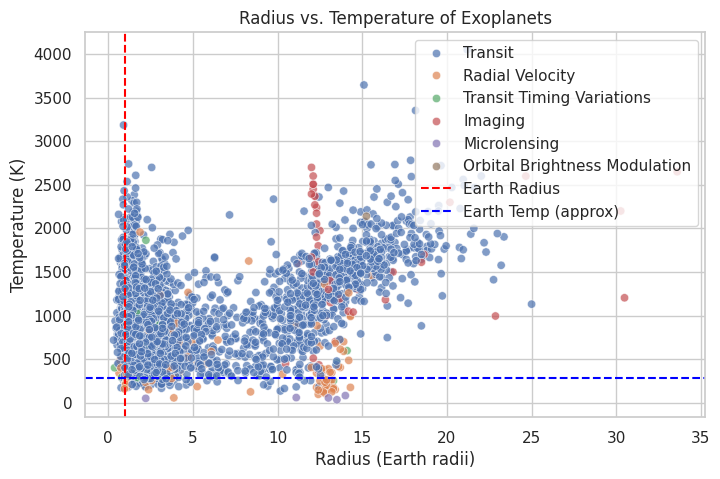

In [ ]:
# Compare planet radius with temperature to look for Earth-like candidates
plt.figure(figsize=(8,5))
sns.scatterplot(x='radius', y='temperature', data=df_clean, hue='discoverymethod', alpha=0.7)
plt.axvline(1, color='red', linestyle='--', label='Earth Radius')
plt.axhline(288, color='blue', linestyle='--', label='Earth Temp (approx)')
plt.title('Radius vs. Temperature of Exoplanets')
plt.xlabel('Radius (Earth radii)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()


📝 Insight: Exoplanets close to (1, 288) on this plot are the best Earth-like candidates.

 ### Discovery Trend by Year

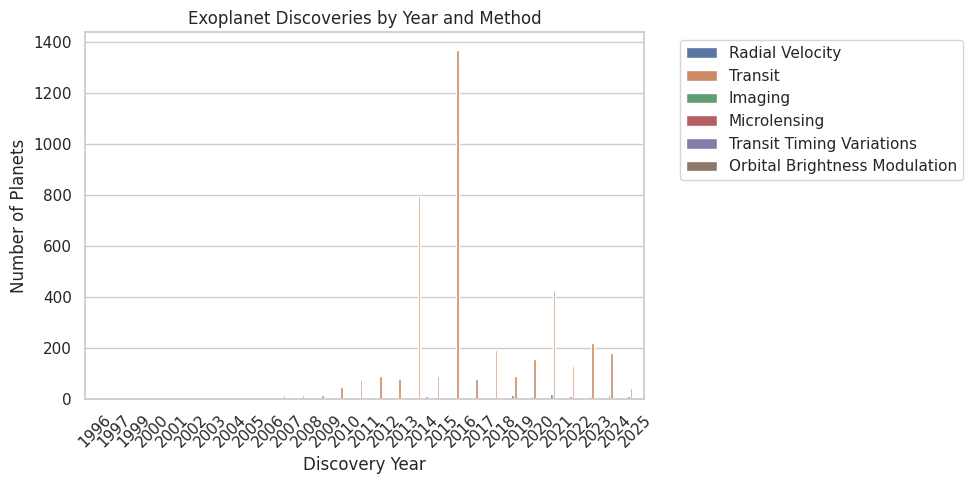

In [ ]:
# Explore discovery trends over time by detection method
plt.figure(figsize=(10,5))
sns.countplot(data=df_clean, x='disc_year', hue='discoverymethod', dodge=True)
plt.title('Exoplanet Discoveries by Year and Method')
plt.xlabel('Discovery Year')
plt.ylabel('Number of Planets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📝 Insight: Exoplanet discoveries surged post-2009, especially by transit methods (e.g., Kepler).

### 📦 Distributions of All Key Features

/tmp/ipython-input-24-2242584406.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


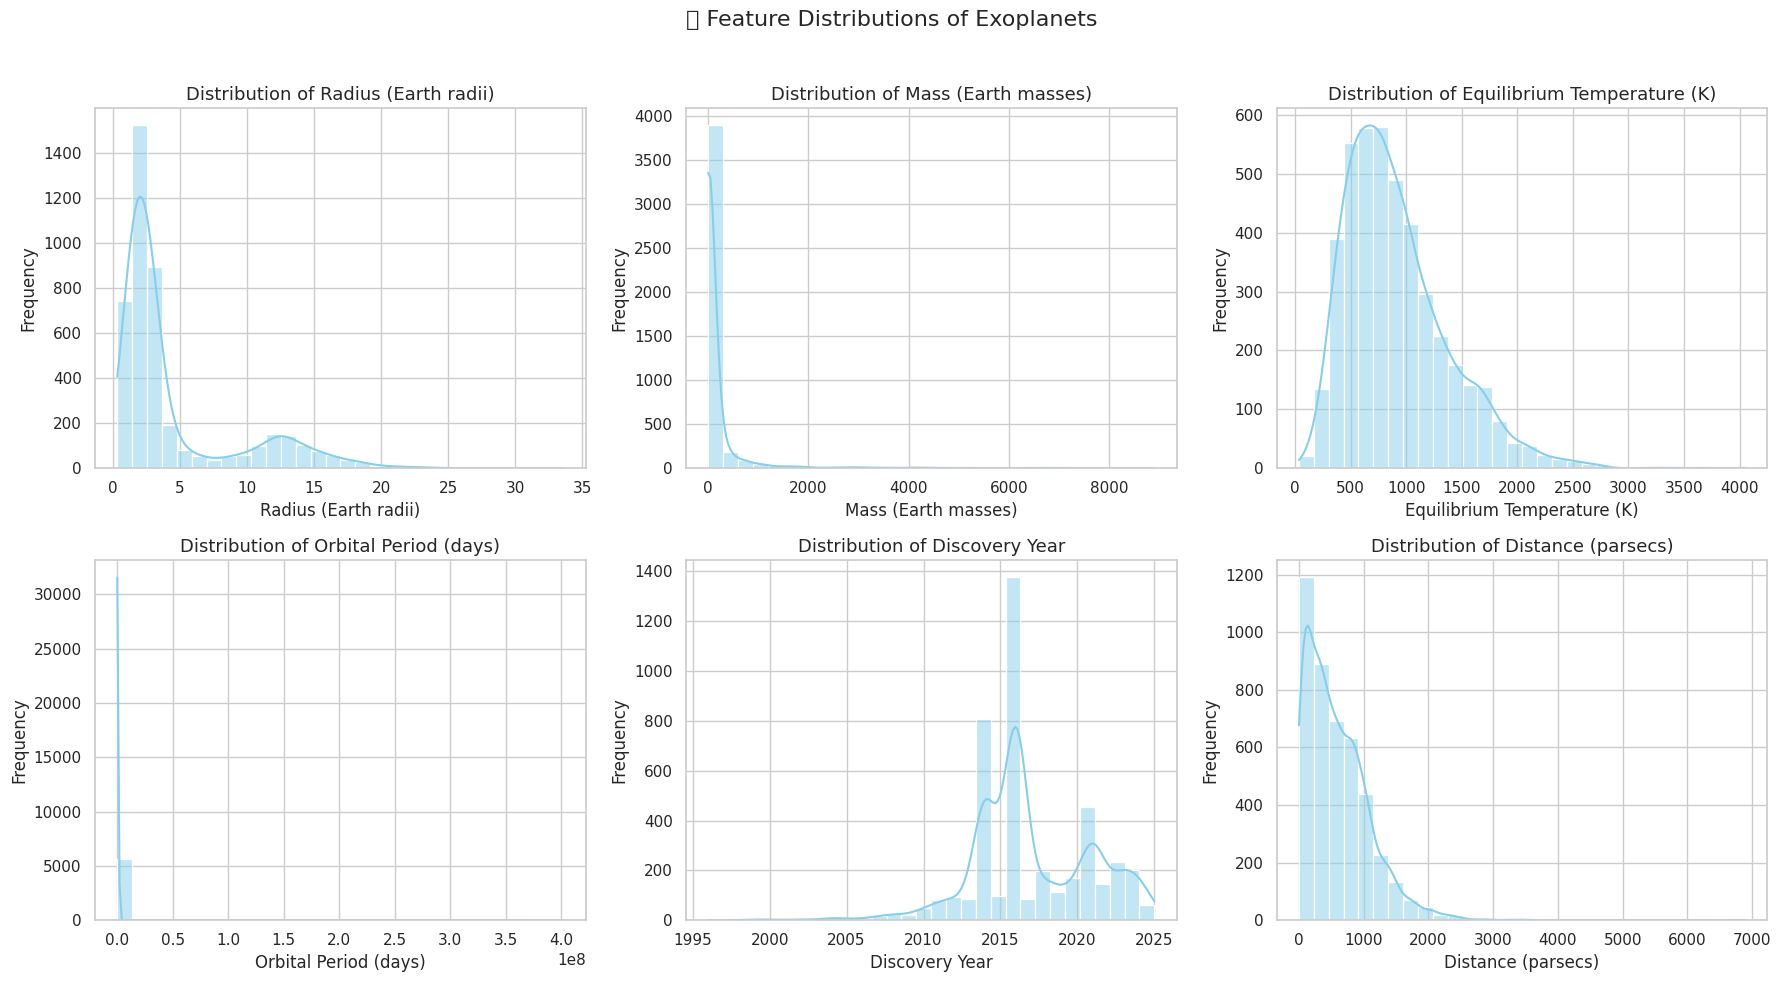

In [ ]:
# Define the features and human-readable titles
features = ['radius', 'mass', 'temperature', 'pl_orbper', 'disc_year', 'distance']
titles = ['Radius (Earth radii)', 'Mass (Earth masses)', 'Equilibrium Temperature (K)',
          'Orbital Period (days)', 'Discovery Year', 'Distance (parsecs)']

# Setup subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Loop through features and plot
for i, col in enumerate(features):
    data = df_clean[col] if col in df_clean.columns else df[col]
    sns.histplot(data.dropna(), bins=30, ax=axs[i//3, i%3], kde=True, color='skyblue')
    axs[i//3, i%3].set_title(f'Distribution of {titles[i]}', fontsize=13)
    axs[i//3, i%3].set_xlabel(titles[i])
    axs[i//3, i%3].set_ylabel('Frequency')

plt.suptitle("🔍 Feature Distributions of Exoplanets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
plt.show()

##Relationships Between Features

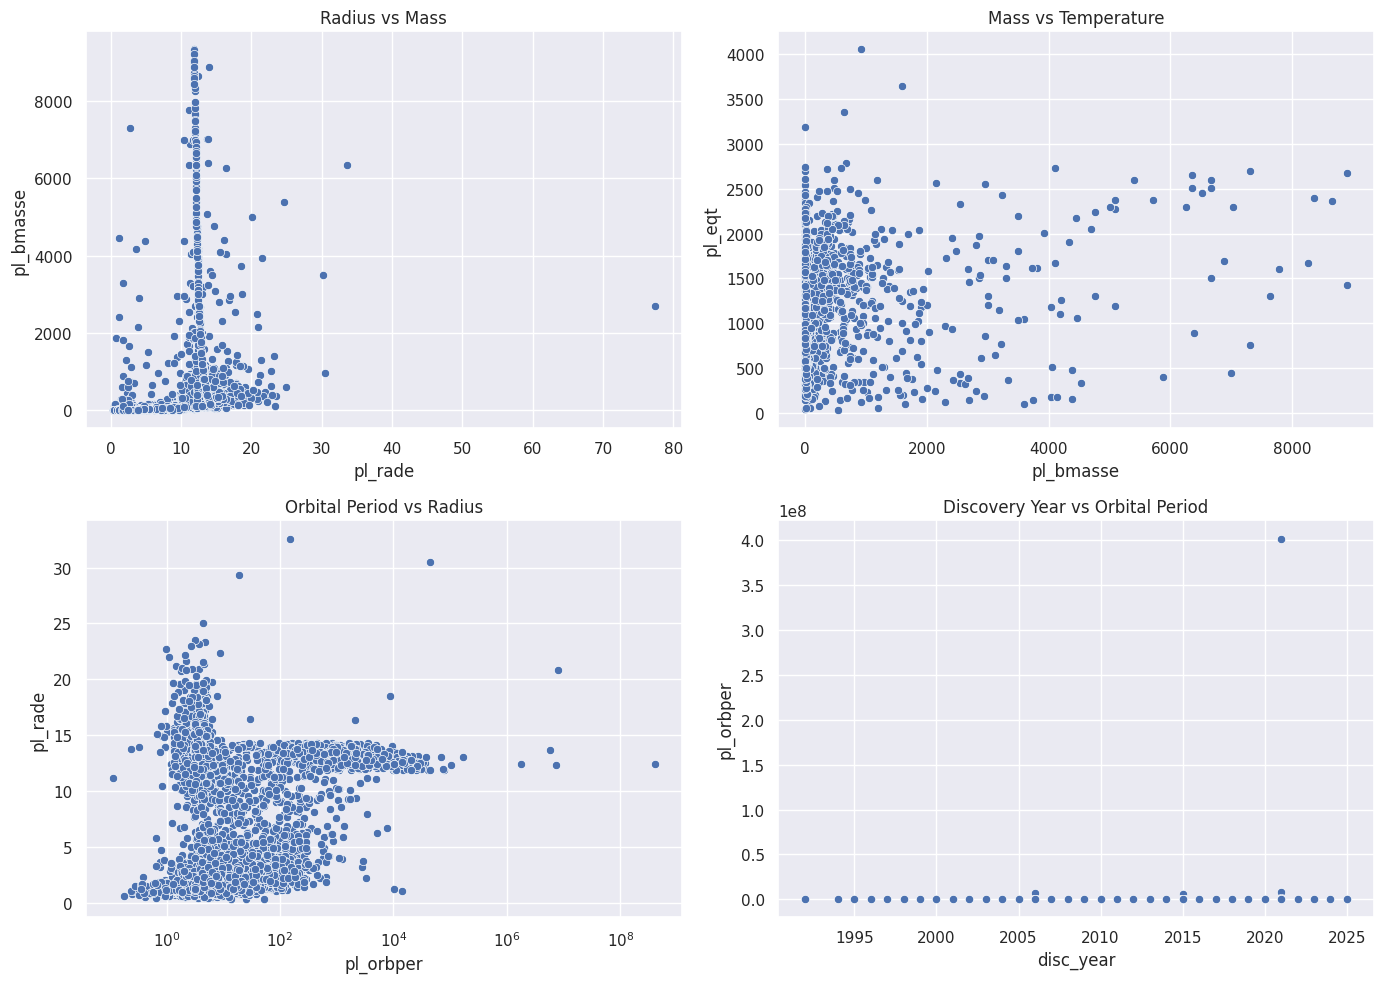

In [ ]:
# Correlations between variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='pl_rade', y='pl_bmasse', ax=axs[0,0])
axs[0,0].set_title('Radius vs Mass')

sns.scatterplot(data=df, x='pl_bmasse', y='pl_eqt', ax=axs[0,1])
axs[0,1].set_title('Mass vs Temperature')

sns.scatterplot(data=df, x='pl_orbper', y='pl_rade', ax=axs[1,0])
axs[1,0].set_title('Orbital Period vs Radius')
axs[1,0].set_xscale('log')

sns.scatterplot(data=df, x='disc_year', y='pl_orbper', ax=axs[1,1])
axs[1,1].set_title('Discovery Year vs Orbital Period')

plt.tight_layout()
plt.show()

##Clustering Analysis (KMeans)

### *Feature* Scaling


In [ ]:
# Prepare selected features and standardize them for clustering
features = df_clean[['radius', 'mass', 'temperature', 'distance']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


### Apply KMeans Clustering

In [ ]:
# Apply KMeans algorithm to categorize planets into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(features_scaled)


### Visualize Clusters

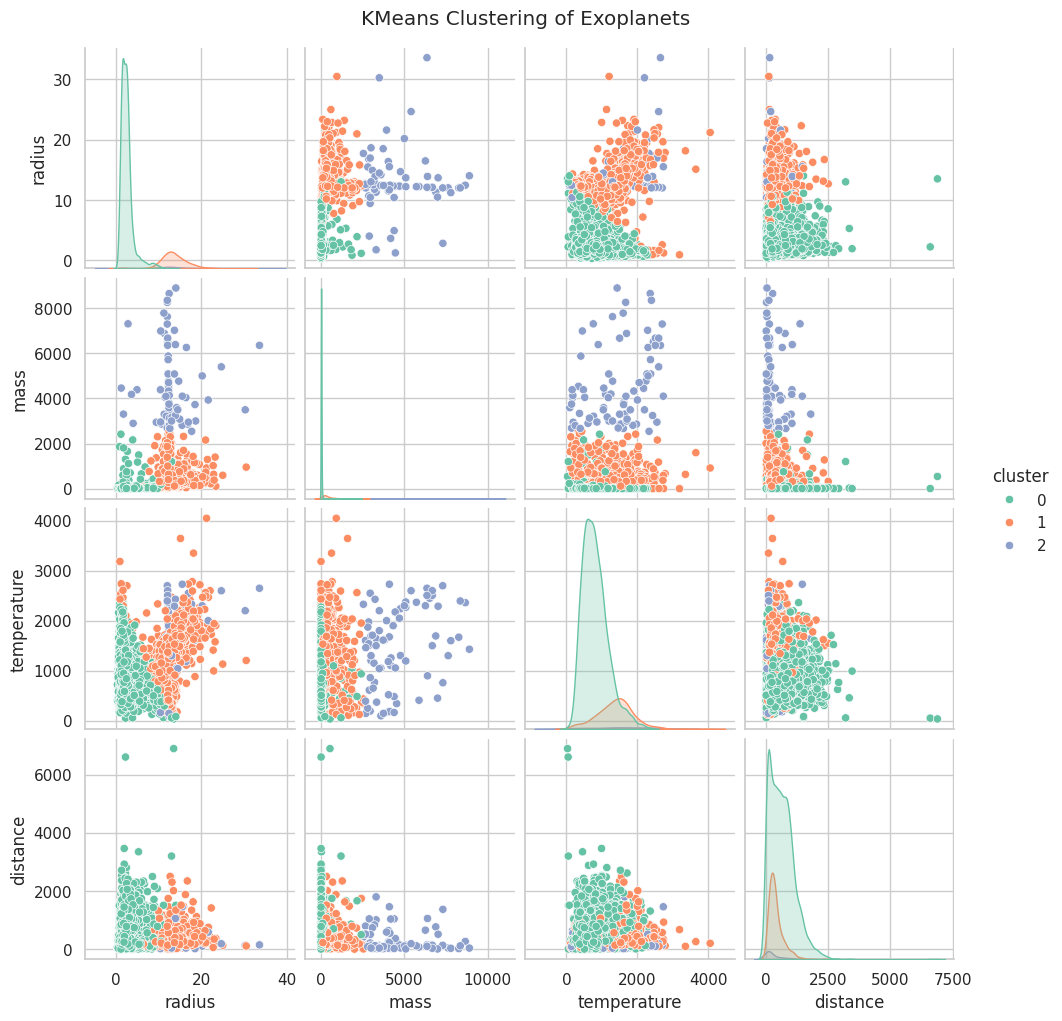

In [ ]:
# Visualize the clusters using seaborn's pairplot
sns.pairplot(df_clean[['radius', 'mass', 'temperature', 'distance', 'cluster']], hue='cluster', palette='Set2')
plt.suptitle('KMeans Clustering of Exoplanets', y=1.02)
plt.show()


## 🔍 Results & Interpretation

- **Cluster 0**: Small rocky planets with moderate temperatures  
- **Cluster 1**: Hot gas giants close to their stars  
- **Cluster 2**: Large, cold distant planets  

Planets near Earth’s radius (1) and temperature (~288 K) might be promising candidates for habitability.


 ### Boxplot by Cluster

/tmp/ipython-input-26-3690012045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='radius', data=df_clean, palette='Set2')


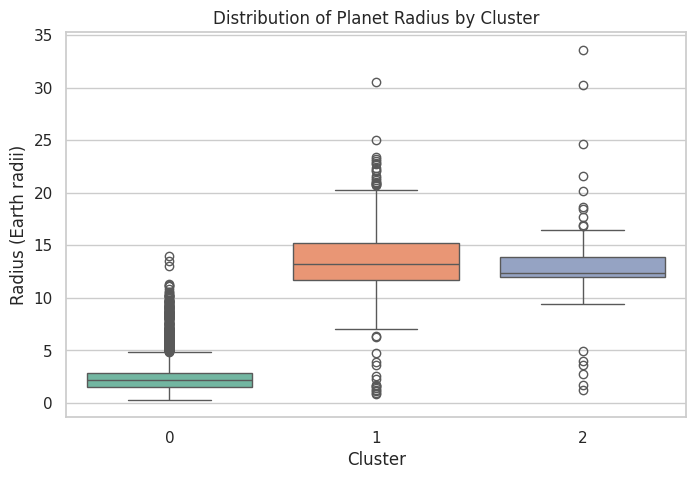

In [ ]:
# Boxplot for radius by cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='radius', data=df_clean, palette='Set2')
plt.title('Distribution of Planet Radius by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Radius (Earth radii)')
plt.show()


## ✅ Summary & Conclusion

- The dataset reveals a wide diversity of exoplanets in terms of mass, size, and temperature.
- Most discoveries occurred post-2010, dominated by transit methods.
- Clustering reveals distinct planetary groups, where Cluster 0 potentially contains Earth-like worlds.
- Further analysis could incorporate atmospheric data or host star properties for better habitability insights.


## 📚 References

- [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)
- Seaborn, pandas, scikit-learn documentation
- KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
